## Support Vector Classifier
Support vector machines are useful models for highly dimensional data, that is, data with a lot of columns.

In [1]:
import pandas as pd
import sklearn

pt_info_clean = pd.read_csv("../data/interim/pt_info_clean.csv")

We begin by splitting the data into 2 sets:

- `train`: a set of feature vectors which will be used to train the model

- `test`:  a set of feature vectors which will be used to evaluate the model we trained

In [2]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(pt_info_clean, \
                                                                    pt_info_clean['mrsa_positive'], \
                                                                    test_size=0.2, \
                                                                    random_state=430)
print(x_train)

     Unnamed: 0  mrsa_positive   MITRAL REGURGITATION  ABDOMINAL PAIN  \
100         100            1.0                      0               0   
133         133            0.0                      0               0   
75           75            1.0                      0               0   
101         101            1.0                      0               0   
132         132            0.0                      0               0   
..          ...            ...                    ...             ...   
77           77            1.0                      0               0   
20           20            0.0                      0               0   
103         103            1.0                      0               0   
67           67            0.0                      0               0   
15           15            0.0                      0               0   

     ABSCESS  ACUTE CHOLANGITIS  ACUTE CHOLECYSTITIS  \
100        0                  0                    0   
133        

In [3]:
from sklearn.svm import SVC

model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

In [4]:
predictions = model.predict(x_test)

[[19  1]
 [ 3  6]]


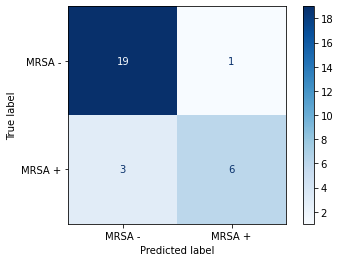

In [5]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['MRSA -', 'MRSA +']
                  
disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

In [6]:
from matplotlib import pyplot as plt
plt.savefig('../reports/figures/svc_confusion_matrix.png')

<Figure size 432x288 with 0 Axes>

We want to save the model so that we can use it outside of this notebook.

In [7]:
model

SVC()

In [8]:
from mlworkflows import util
util.serialize_to(model, "../models/svc_model.sav")